In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
from keras._tf_keras.keras.models import Sequential,load_model
from keras._tf_keras.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras._tf_keras.keras.preprocessing import image

In [12]:
img_height, img_width = 28, 28
batch_size = 32

df = pd.read_csv('pics_labels.csv')

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory='Dataset/',
    x_col="filename",
    y_col="label",
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory='Dataset/',
    x_col="filename",
    y_col="label",
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

num_classes = len(train_generator.class_indices)
print(f"Number of classes (letters): {num_classes}")

Found 7867 validated image filenames belonging to 63 classes.
Found 1966 validated image filenames belonging to 63 classes.
Number of classes (letters): 63


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 12 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 12 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


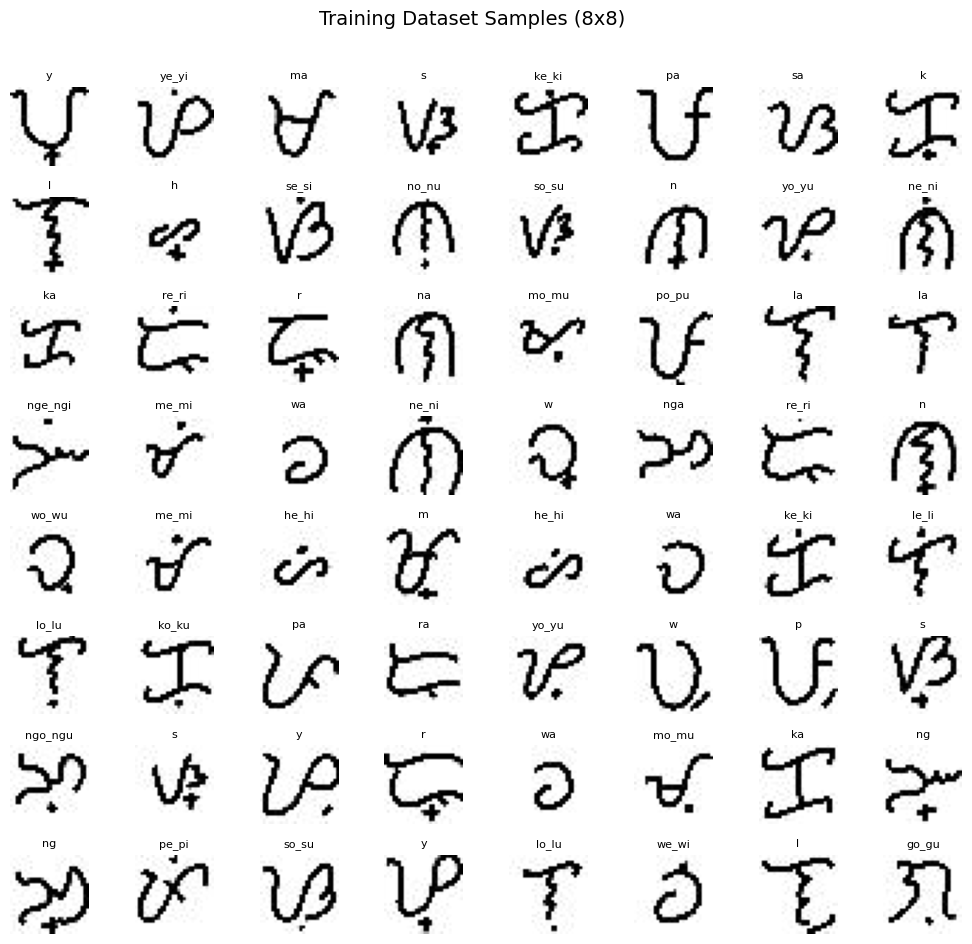

In [27]:
fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])

fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False

# Create a reverse lookup for class indices
labels = {v: k for k, v in train_generator.class_indices.items()}

for i, ax in enumerate(axes.flat):
    # Get a batch from the generator
    batch_images, batch_labels = next(train_generator)
    
    # Pick a random image from the batch
    rand_img_idx = np.random.randint(0, batch_images.shape[0])

    image = batch_images[rand_img_idx].reshape((28, 28))
    label_index = np.argmax(batch_labels[rand_img_idx])
    label = labels[label_index]

    ax.imshow(image, cmap='gray')
    ax.set_title(label, fontsize=8)
    ax.set_axis_off()

fig.suptitle("Training Dataset Samples (8x8)", fontsize=14)
plt.show()


In [ ]:

model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax'),
    Dropout(0.8),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 63)             │        32,319 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 63)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191,039 (746.25 KB)

 Trainable params: 191,039 (746.25 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1050 - loss: 3.4598 - val_accuracy: 0.0392 - val_loss: 16.3634
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4415 - loss: 1.4270 - val_accuracy: 0.0422 - val_loss: 15.8211
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5619 - loss: 1.0737 - val_accuracy: 0.0432 - val_loss: 17.2794
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6221 - loss: 0.9065 - val_accuracy: 0.0422 - val_loss: 18.3052
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6783 - loss: 0.7889 - val_accuracy: 0.0422 - val_loss: 18.5114
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6980 - loss: 0.7316 - val_accuracy: 0.0432 - val_loss: 19.8576
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7189 - loss: 0.6603 - val_accuracy: 0.0437 - val_loss: 22.1785
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7291 - loss: 0.6316 - v

In [6]:
model.save('letter_recognizer_model.h5')

In [22]:

img_path = 'test letter.png'
img = image.load_img(img_path, target_size=(img_height, img_width), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
labels = list(train_generator.class_indices.keys())
predicted_letter = labels[predicted_class_index]

print(f"Predicted Letter: {predicted_letter}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted Letter: h


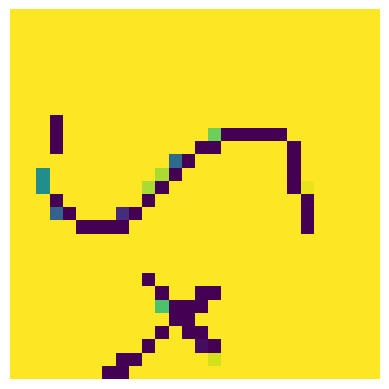

In [23]:
plt.imshow(img)
plt.axis('off')
plt.show()